This notebook presents all the analysis for the laboratory sample of Study 7 of the paper.

Click the "Show Code" buttons to see the code associated with each output.

# Preamble

## Libraries

In [1]:
# Misc
import warnings

warnings.filterwarnings("ignore")
from IPython.display import Markdown

# Data libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_context("notebook")

# Statistics
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import ks_2samp, zscore
from statsmodels.stats.proportion import proportions_chisquare

# Interface with R
import rpy2

%load_ext rpy2.ipython

STUDY_NAME = "Study 7L"

## Functions

In [2]:
# fmt: off
ARRAYS = {
    "Lower": np.array(
        [
            30, 30,
            31,  31,  31,  31,  31,  31,
            32,  32,  32,  32,  32,  32,  32,  32,  32,
            33,  33,  33,  33,  33,  33,
            34,  34
        ]
    ),
    "Equal": np.array(
        [
             27,
             28,
             29,  29,
             30,  30, 30,
             31,  31,  31,
             32,  32,  32,  32, 32,  
             33,  33,  33, 
             34,  34,  34,
             35,  35,
             36,
             37
        ]
    ),
    "Higher": np.array(
        [
            14,
            18,
            21,
            22,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            37,
            38,
            39,
            40,
            42,
            43,
            46,
            50,
        ]
    ),
}
# fmt: on


def plot_design(
    save=False, show=True, grayscale=False, figname="Study 4 - Design",
):

    if grayscale:
        pal = sns.color_palette("Greys")[2::3]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[2:0:-1]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    sns.set_style("ticks")
    fig, axes = plt.subplots(2, 1, figsize=(6.38, 6.38))
    axes = axes.flatten()
    for i, (manip, common, title) in enumerate(
        zip(
            [ARRAYS["Lower"], ARRAYS["Higher"]],
            [ARRAYS["Equal"], ARRAYS["Equal"]],
            ["Less Dispersion", "More Dispersion"],
        )
    ):
        ax = axes[i]
        ax.annotate(title, (21, 5), size=12, va="center", ha="center")
        bins = np.arange(0, 51, 1)
        ax.hist(
            common,
            bins=bins,
            label="Amazon Gift Card",
            color=pal[1],
            density=False,
            align="left",
            rwidth=0.7,
            lw=0,
        )
        ax.hist(
            manip,
            bins=bins,
            label="Other Gift Card",
            color=pal[0],
            density=False,
            align="left",
            rwidth=0.35,
            lw=0,
        )
        leg = ax.legend()
        han = leg.legendHandles
        leg.remove()
        ax.set_xticks(np.arange(10, 55, 5))
        ax.set_xticklabels([f"${i}" for i in np.arange(10, 55, 5)])
        ax.set_xlim(8, 52)
        ax.set_ylim(0, 10)
        ax.set_yticklabels(np.arange(0, 12, 2))
        ax.set_ylabel("Number of Bids")
        sns.despine(ax=ax)
    axes[0].legend(
        handles=han,
        loc="center left",
        title="Item",
        frameon=False,
        bbox_to_anchor=(0.6, 0.75),
    )

    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.15, left=0)

    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()


def plot_cdf_memory_max_bid(
    data,
    save=False,
    show=True,
    grayscale=False,
    figname=f"Fig 12 - {STUDY_NAME} - CDF Max Bid",
):
    if grayscale:
        pal = sns.color_palette("Greys")[1::2]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette("coolwarm", 3)[::2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")
    sns.set_style("ticks")

    g = sns.FacetGrid(
        hue="condition", data=data, palette=pal, height=6.38 / 1.5, aspect=1.5
    )
    g.map(
        plt.hist,
        "memory_max_bid",
        cumulative=True,
        histtype="step",
        bins=np.arange(30, 71, 1),
        density=True,
        align="mid",
        lw=2,
    )
    g.add_legend(title="", bbox_to_anchor=(0.9, 0.5))
    g.set_xlabels("Memory for Largest Bid on Amazon Gift Card")
    g.set_ylabels("Cumulative Proportion of Participants")
    g.ax.axvline(37, ls=":", color="grey")
    g.ax.annotate("True Largest Bid", (37.5, 0.475), ha="left", color="grey")
    g.ax.set_xticks(np.arange(30, 65, 5))
    g.ax.set_xticklabels([f"${i}" for i in np.arange(30, 65, 5)])
    g.ax.set_xlim(28, 57)
    plt.tight_layout()
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()

        
def plot_cdf_bid_placed(
    data,
    save=False,
    show=True,
    grayscale=False,
    figname=f"Fig 13 - {STUDY_NAME} - CDF Bid Placed",
):
    if grayscale:
        pal = sns.color_palette("Greys")[1::2]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette("coolwarm", 3)[::2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")
    sns.set_style("ticks")

    g = sns.FacetGrid(
        hue="condition", data=data, palette=pal, height=6.38 / 1.5, aspect=1.5
    )
    g.map(
        plt.hist,
        "bid_placed",
        cumulative=True,
        histtype="step",
        bins=np.arange(0, 70, 1),
        density=True,
        align="mid",
        lw=2
    )
    g.add_legend(title="", bbox_to_anchor=(0.4, 0.5))
    g.set_xlabels("Bid Placed for Amazon Gift Card")
    g.set_ylabels("Cumulative Proportion of Participants")
    g.ax.axvline(38, ls=":", color="grey")
    g.ax.annotate("Optimal Bid", (37, 0.475), ha="right", color="grey")
    g.ax.set_xticks(np.arange(0, 70, 10))
    g.ax.set_xticklabels([f"${i}" for i in np.arange(0, 70, 10)])
    g.ax.set_xlim(-5, 65)
    plt.tight_layout()
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()



def format_pvals(p):
    if p < 0.001:
        return "p < .001"
    else:
        return "p = " + f"{p:.3f}".lstrip("0")

## Data loading and preparation

In [3]:
df = pd.read_csv(f"../Data/{STUDY_NAME}/CleanData.csv")
df_clean = df[~df.excluded]

# Design

## Independent variable

Each participant sees two distribution of bids, one for a \\$100 "Whole Foods" (or "Bol.com") gift card, one for a $100 "Amazon" gift card.
* The bids for the Amazon gift card have a moderate amount of variance (SD = 2.4, Min = 27, Max = 37)
* The bids for the Whole Foods gift card have a different variance, manipulated between subjects:
    * "Lower Dispersion" (SD = 1.1, Min = 30, Max = 34)
    * "Higher Dispersion" (SD = 8.7, Min = 14, Max = 50) 

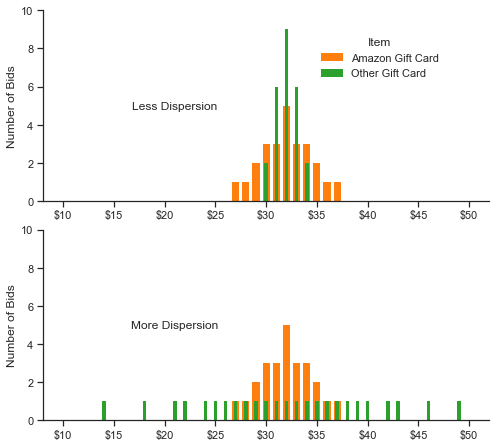

In [4]:
plot_design(show=True, save=False)

## Dependent variable and hypothesis

After reviewing the bids, the participants are informed that we are now auctioning one last item: a \\$100 Amazon gift card. We endow them with \$60, and give them the opportunity to bid as much as they want from this amount in order to try and win the Amazon gift card. The amount of the bid constitutes our dependent variable. 

After participants placed and confirmed their bid, we asked them to report the maximum bid (excluding theirs) that they remember seeing for the Amazon gift card.

## Participants and exclusions

In [5]:
Markdown(
    f"""
We collected {df.shape[0]} participants. As pre-registered, we excluded any participant who:
* Reported a maximum price that was smaller than the median bid (i.e., 32).
* Failed at least one comprehension question testing their understanding of the auction mechanism.

In total, we excluded {(df.shape[0] - df_clean.shape[0])} participants, and were left with {df_clean.shape[0]} valid responses.
"""
)


We collected 490 participants. As pre-registered, we excluded any participant who:
* Reported a maximum price that was smaller than the median bid (i.e., 32).
* Failed at least one comprehension question testing their understanding of the auction mechanism.

In total, we excluded 165 participants, and were left with 325 valid responses.


# Analysis

## Memory for Maximum Bid

In [6]:
ols = smf.ols(
    "memory_max_bid ~ C(dispersion, levels=['Lower', 'Higher'])", data=df_clean
).fit()
dfd = ols.df_resid
b = ols.params[1]
pval = ols.pvalues[1]
tstat = ols.tvalues[1]

stdb = (
    smf.ols(
        "zscore(memory_max_bid) ~ C(dispersion, levels=['Lower', 'Higher'])",
        data=df_clean,
    )
    .fit()
    .params[1]
)
nobs = df_clean.groupby("dispersion").above_actual_max.count()
nsuc = df_clean.groupby("dispersion").above_actual_max.sum()
props = nsuc / nobs * 100
chi, p = proportions_chisquare(nsuc[[0, 1]], nobs[[0, 1]])[0:2]

Markdown(
    f"""
We replicate the dispersion spillover in the lab samples: 
* Participants reported seeing a maximum bid for the Amazon gift card that was on average $\\$${b:.2f} more when the dispersion of bids for the Whole Foods gift card was higher 
(vs. lower; t({dfd:.0f}) = {tstat:.2f}, {format_pvals(pval)}, standardized b = {stdb:.2f}). 
* When the bids for the Whole Foods gift card had a larger amount of dispersion, 
{props[0]:.0f}% of participants reported a maximum bid that was above the true maximum bid (i.e., $\\$$37). 
* Only {props[1]:.0f}% of participants did so when the bids for the Whole Foods gift card had a smaller amount of dispersion 
({props[0]:.0f}% vs. {props[1]:.0f}%: $\chi$(1) = {chi:.2f}, {format_pvals(p)}.
    """
)


We replicate the dispersion spillover in the lab samples: 
* Participants reported seeing a maximum bid for the Amazon gift card that was on average $\$$1.61 more when the dispersion of bids for the Whole Foods gift card was higher 
(vs. lower; t(323) = 5.04, p < .001, standardized b = 0.54). 
* When the bids for the Whole Foods gift card had a larger amount of dispersion, 
23% of participants reported a maximum bid that was above the true maximum bid (i.e., $\$$37). 
* Only 6% of participants did so when the bids for the Whole Foods gift card had a smaller amount of dispersion 
(23% vs. 6%: $\chi$(1) = 19.12, p < .001.
    

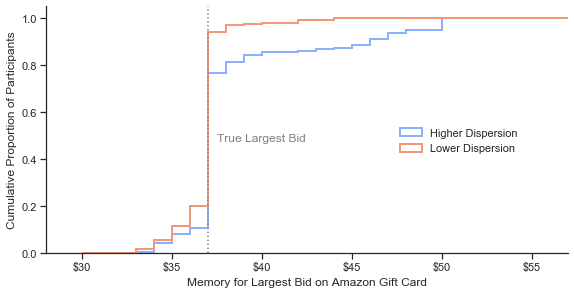

In [7]:
plot_cdf_memory_max_bid(data=df_clean, save=False) 

## Bid Placed

In [8]:
ols = smf.ols(
    "bid_placed ~ C(dispersion, levels=['Lower', 'Higher'])", data=df_clean
).fit()
dfd = ols.df_resid
b = ols.params[1]
pval = ols.pvalues[1]
tstat = ols.tvalues[1]

stdb = (
    smf.ols(
        "zscore(bid_placed) ~ C(dispersion, levels=['Lower', 'Higher'])", data=df_clean
    )
    .fit()
    .params[1]
)


Markdown(
    f"""
We also replicate the pattern on the amount of the bid that participants submitted for the Amazon gift card. Participants submit a bid that is on average $\\$${b:.2f}
larger when the dispersion of bids for the Whole Foods gift card was high (vs. low; t({dfd:.0f}) = {tstat:.2f}, {format_pvals(pval)}, standardized b = {stdb:.2f}).  
"""
)


We also replicate the pattern on the amount of the bid that participants submitted for the Amazon gift card. Participants submit a bid that is on average $\$$2.88
larger when the dispersion of bids for the Whole Foods gift card was high (vs. low; t(323) = 3.11, p = .002, standardized b = 0.34).  


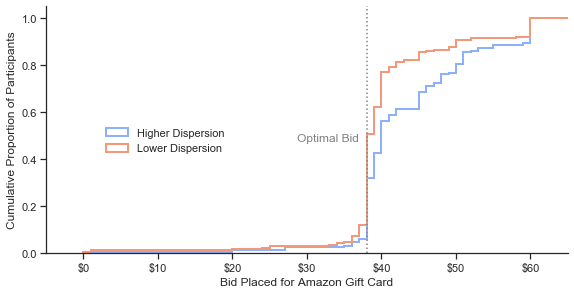

In [9]:
plot_cdf_bid_placed(data=df_clean, save=False)